# 1. Map the problem to circuits

## Circuit library

### Standard gates

The circuit library also includes standard quantum gates. Some are more fundamental gates (such as the UGate), and others are multi-qubit gates that usually need building from single- and two-qubit gates. To add imported gates to your circuit, use the append method; the first argument is the gate, and the next argument is a list of qubits to apply the gate to.

For example, the following code cell creates a circuit with a Hadamard gate and a multi-controlled-X gate.

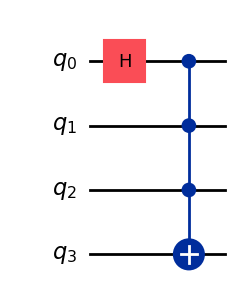

In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import HGate, MCXGate
 
mcx_gate = MCXGate(3)
hadamard_gate = HGate()
 
qc = QuantumCircuit(4)
qc.append(hadamard_gate, [0])
qc.append(mcx_gate, [0, 1, 2, 3])
qc.draw("mpl")

### N-local circuits

In [3]:
from qiskit.circuit.library import n_local
 
two_local = n_local(3, "rx", "cz")
two_local.draw("mpl")

two_local.parameters

ParameterView([ParameterVectorElement(θ[0]), ParameterVectorElement(θ[1]), ParameterVectorElement(θ[2]), ParameterVectorElement(θ[3]), ParameterVectorElement(θ[4]), ParameterVectorElement(θ[5]), ParameterVectorElement(θ[6]), ParameterVectorElement(θ[7]), ParameterVectorElement(θ[8]), ParameterVectorElement(θ[9]), ParameterVectorElement(θ[10]), ParameterVectorElement(θ[11])])

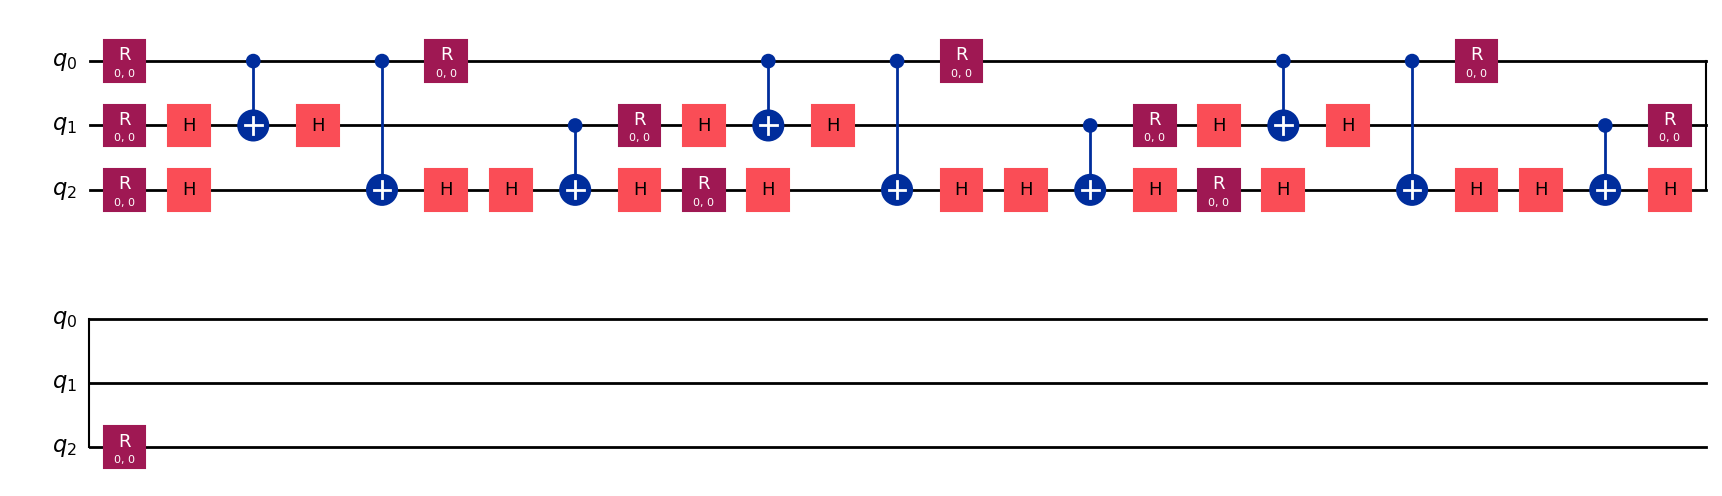

In [4]:
bound_circuit = two_local.assign_parameters(
    {p: 0 for p in two_local.parameters}
)
bound_circuit.decompose().draw("mpl")

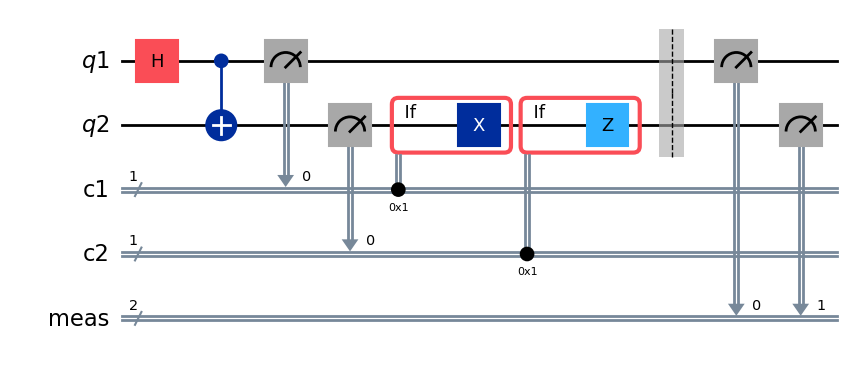

In [24]:
from qiskit.circuit import QuantumRegister, ClassicalRegister, QuantumCircuit

q1 = QuantumRegister(1, "q1")
q2 = QuantumRegister(1, "q2")
c1 = ClassicalRegister(1, "c1")
c2 = ClassicalRegister(1, "c2")

qc = QuantumCircuit(q1, q2, c1, c2)
qc.h(q1)
qc.cx(q1, q2)
qc.measure(q1, c1)
qc.measure(q2, c2)
with qc.if_test((c1, 1)):
    qc.x(q2)
with qc.if_test((c2, 1)):
    qc.z(q2)
qc.measure_all()
qc.draw("mpl")

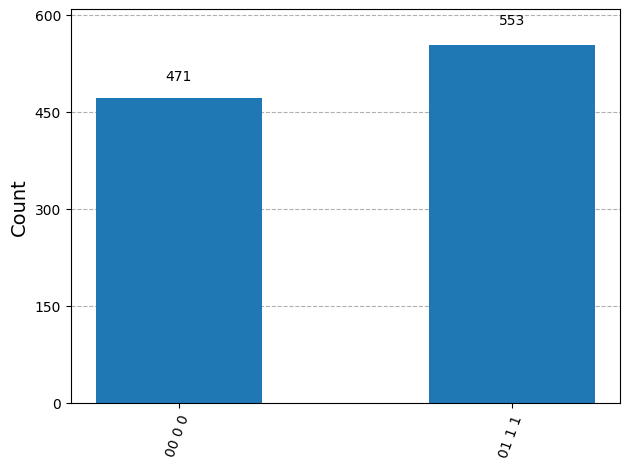

In [25]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.result import marginal_distribution
result = AerSimulator().run(qc).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

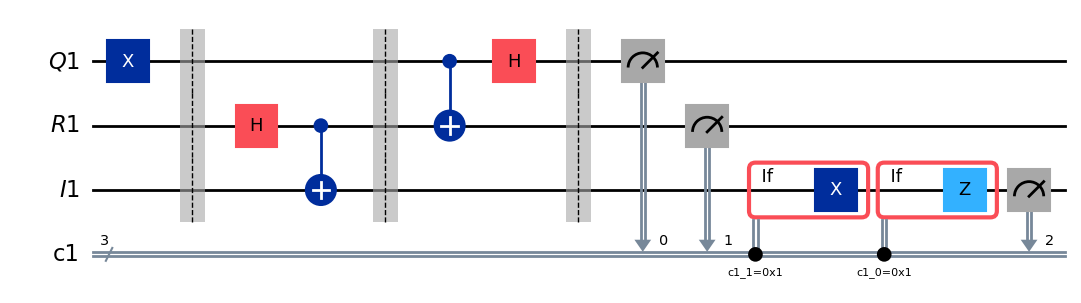

In [36]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library import CXGate, HGate, XGate, ZGate

CNOT = CXGate()
H = HGate()
X = XGate()
Z = ZGate()



Q1 = QuantumRegister(1, 'Q1') # Qubit to be teleported
R1 = QuantumRegister(1, 'R1') # Raees' qubit (part of entangled pair)
I1 = QuantumRegister(1, 'I1') # Inayat's qubit (part of entangled pair)
c1 = ClassicalRegister(3, 'c1')
qc_1 = QuantumCircuit(Q1, R1, I1, c1)

qc_1.append(X, [Q1]) # Prepare |1> state on Q
qc_1.barrier()
qc_1.append(H, [R1])
qc_1.append(CNOT, [R1, I1])
qc_1.barrier()
qc_1.append(CNOT, [Q1, R1])
qc_1.append(H, [Q1])
qc_1.barrier()
qc_1.measure(Q1, c1[0])
qc_1.measure(R1, c1[1])
with qc_1.if_test((c1[1], 1)):
    qc_1.append(X, [I1]) # If a=1, apply X gate
with qc_1.if_test((c1[0], 1)):
    qc_1.append(Z, [I1]) # If b=1, apply Z gate
qc_1.measure(I1, c1[2])
qc_1.draw('mpl')


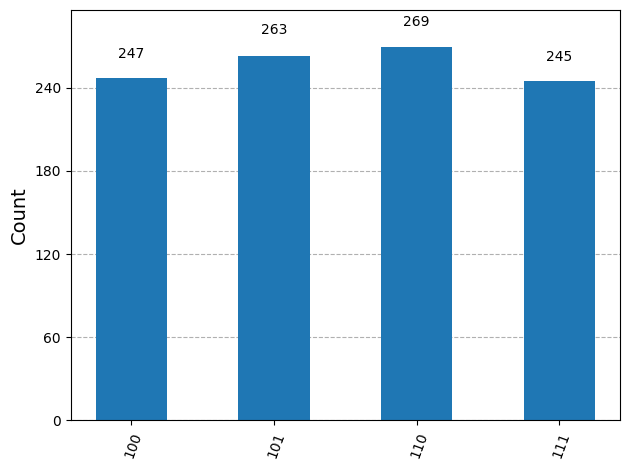

In [37]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

result = AerSimulator().run(qc_1).result()
statistics = result.get_counts()
display(plot_histogram(statistics))